# Bell State

In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2)

In [3]:
cr = ClassicalRegister(2)

In [4]:
circ = QuantumCircuit(qr, cr)

In [5]:
circ.h(qr[0])


In [6]:
circ.cx(qr[0], qr[1])

In [7]:
circ.measure(qr, cr)

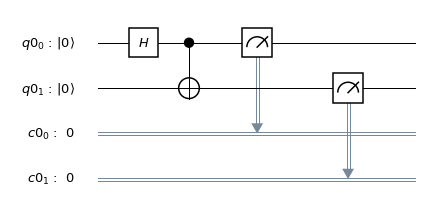

In [8]:
%matplotlib inline
circ.draw(output='mpl')

In [9]:
simulator = Aer.get_backend('qasm_simulator')

In [10]:
result = execute(circ, backend = simulator).result()

In [11]:
from qiskit.tools.visualization import plot_histogram as plt_hist

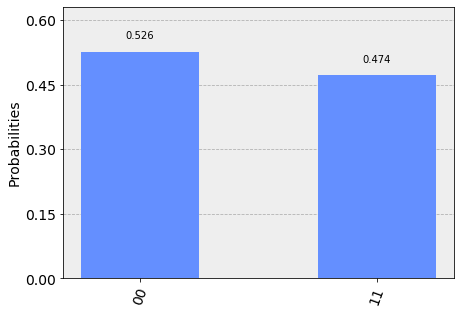

In [12]:
plt_hist(result.get_counts(circ))

In [13]:
IBMQ.enable_account('your_token') #here goes your IBMQ toeken; check your account settings for more

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circ, backend=qcomp)

In [20]:
from qiskit.tools.monitor import backend_overview, job_monitor
backend_overview()

C:\Users\Bartosz\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


ibmq_16_melbourne            ibmqx4                      ibmqx2
-----------------            ------                      ------
Num. Qubits:  14             Num. Qubits:  5             Num. Qubits:  5
Pending Jobs: 34             Pending Jobs: 6             Pending Jobs: 90
Least busy:   False          Least busy:   True          Least busy:   False
Operational:  True           Operational:  True          Operational:  False
Avg. T1:      53.5           Avg. T1:      42.5          Avg. T1:      57.4
Avg. T2:      69.8           Avg. T2:      15.6          Avg. T2:      48.8





In [21]:
job_monitor(job)

Job Status: job has successfully run


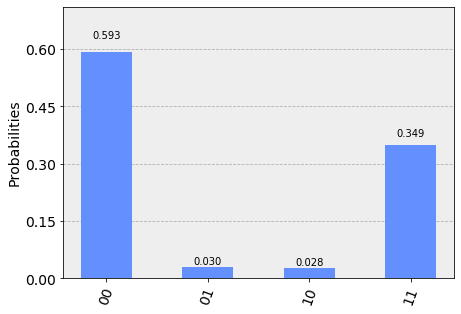

In [22]:
result = job.result()
plt_hist(result.get_counts(circ))